In [24]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
## Use the dataframe and create a sqlite db

connection = sqlite3.connect('../2023_SqliteDV.db')

query = "SELECT * FROM plays"

df = pd.read_sql_query(query, connection)

In [26]:
connection.close()

In [27]:
## Start some analysis

# Question 1: What were the distribution of yards by rushing attempt for Emmett Johnson

# List of play types to include in rushing dataframe
rushing_types = ['Rush', 'Rushing Touchdown', 'Sack', 'Fumble Recovery (Opponent)']

# Filter the DataFrame to include only Rush play types
rush_df = df[df['Play Type'].isin(rushing_types)]

In [28]:
print(len(rush_df))

482


In [29]:
# Filter the DataFrame to include only rows with 'Emmett Johnson' in the play text column
johnson_df = rush_df[rush_df['Play Text'].str.contains('Emmett Johnson')]

# Adding 'Anthony Grant' as a check
grant_df = rush_df[rush_df['Play Text'].str.contains('Anthony Grant')]

In [30]:
johnson_total_yards = johnson_df['Yards Gained'].sum()
grant_total_yards = grant_df['Yards Gained'].sum()

In [31]:
print(johnson_total_yards)
print(grant_total_yards)

421
428


In [22]:
# johnson_df.head()

In [32]:
johnson_df_sorted = johnson_df.sort_values(by='Wallclock')
johnson_df_sorted_reset = johnson_df_sorted.reset_index(drop=True)
# print(johnson_df_sorted_reset)

In [74]:
grant_df_sorted = grant_df.sort_values(by='Wallclock')
grant_df_sorted_reset = grant_df_sorted.reset_index(drop=True)

In [33]:
# Calculating the average 'Yards Gained' for Emmett
average_yards = johnson_df_sorted_reset['Yards Gained'].mean()
std_dev_yards = johnson_df_sorted_reset['Yards Gained'].std()

In [75]:
# Calculating Grant's average and standard deviation
average_yards = grant_df_sorted_reset['Yards Gained'].mean()
std_dev_yards = grant_df_sorted_reset['Yards Gained'].std()

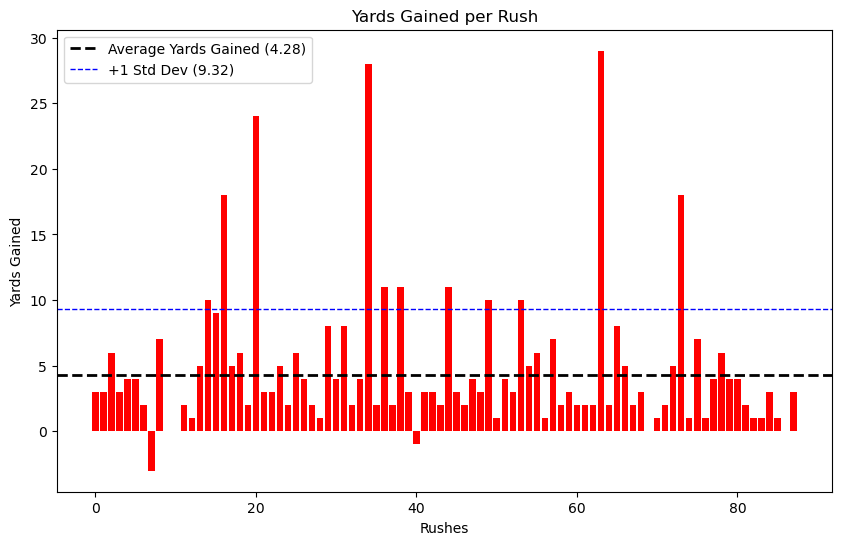

In [76]:
# Creating a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(johnson_df_sorted_reset.index, johnson_df_sorted_reset['Yards Gained'], color='red')

# Adding a horizontal line for the average
plt.axhline(average_yards, color='black', linestyle='--', linewidth=2, label=f'Average Yards Gained ({average_yards:.2f})')

# Adding horizontal lines for the standard deviation
plt.axhline(average_yards + std_dev_yards, color='blue', linestyle='--', linewidth=1, label=f'+1 Std Dev ({average_yards + std_dev_yards:.2f})')

plt.title('Yards Gained per Rush')
plt.xlabel('Rushes')
plt.ylabel('Yards Gained')
plt.legend()
plt.show()

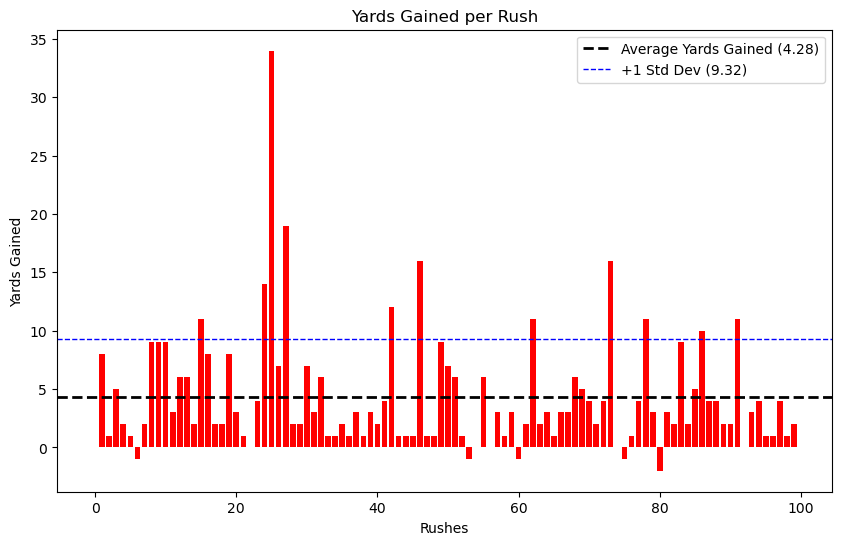

In [77]:
# Creating a bar chart using Matplotlib for Grant
plt.figure(figsize=(10, 6))
plt.bar(grant_df_sorted_reset.index, grant_df_sorted_reset['Yards Gained'], color='red')

# Adding a horizontal line for the average
plt.axhline(average_yards, color='black', linestyle='--', linewidth=2, label=f'Average Yards Gained ({average_yards:.2f})')

# Adding horizontal lines for the standard deviation
plt.axhline(average_yards + std_dev_yards, color='blue', linestyle='--', linewidth=1, label=f'+1 Std Dev ({average_yards + std_dev_yards:.2f})')

plt.title('Yards Gained per Rush')
plt.xlabel('Rushes')
plt.ylabel('Yards Gained')
plt.legend()
plt.show()

In [36]:
# Show number of carries for each player
print(len(johnson_df))
print(len(grant_df))

88
100


In [37]:
# Emmett Johnson had 90 attempts and 411 rushing yards in 2023 according to espn
# Anthony Grant had 104 attempts and 413 rushing yards in 2023 according to espn
# https://www.espn.com/college-football/stats/player/_/view/offense/stat/rushing/group/5/table/rushing/sort/rushingYards/dir/desc

In [38]:
johnson_by_game = johnson_df.groupby('Defense').size()

In [39]:
print(johnson_by_game)

Defense
Illinois           7
Iowa              11
Louisiana Tech     2
Maryland          16
Michigan           2
Michigan State    13
Northwestern      12
Purdue            13
Wisconsin         12
dtype: int64


In [ ]:
# Wisconsin and Maryland games are all short by 1 carry/play
# Unclear as going through the play by play with Wisconsin on ESPN, it only has 12 plays but stats show 13 carries

In [40]:
emmett_play = df[df['Play Text'].str.contains('Emmett Johnson')]

In [41]:
wisconsin_emmett = emmett_play[emmett_play['Defense'] == 'Wisconsin']

In [42]:
print(len(wisconsin_emmett))

12


In [43]:
wisconsin_emmett_rush = wisconsin_emmett[wisconsin_emmett['Play Type'] == 'Rush']

In [44]:
print(len(wisconsin_emmett_rush))

12


In [45]:
emmett_wis_total = wisconsin_emmett_rush['Yards Gained'].sum()
print(emmett_wis_total)

53


In [ ]:
# The stats for Emmett according to ESPN are 13 carries and 50 yards
# So looking for a -3 yards play 

In [46]:
negative_three = df[df['Yards Gained'] == -3]

In [47]:
# print(negative_three)
# No plays for -3 yards by Emmett in the Wisconsin game?

In [48]:
maryland_emmett = emmett_play[emmett_play['Defense'] == 'Maryland']

In [49]:
print(len(maryland_emmett))

20


In [50]:
maryland_emmett_rush = maryland_emmett[maryland_emmett['Play Type'].isin(rushing_types)]

In [51]:
chosen_columns = ['Play Number', 'Defense', 'Yards Gained', 'Play Type', 'Play Text', 'Wallclock']

In [52]:
print(len(maryland_emmett_rush))

16


In [53]:
emmett_maryland_total = maryland_emmett_rush['Yards Gained'].sum()
print(emmett_maryland_total)

89


In [54]:
# ESPN shows 17 rushes for 84 yards
# 1 carry less, 5 yards more?

In [55]:
print(maryland_emmett_rush[chosen_columns].sort_values(by='Wallclock'))

     Play Number   Defense  Yards Gained Play Type  \
197            2  Maryland            10      Rush   
201            6  Maryland             4      Rush   
202            7  Maryland             1      Rush   
208            2  Maryland             3      Rush   
209            3  Maryland            10      Rush   
215            2  Maryland             5      Rush   
216            3  Maryland             6      Rush   
222            9  Maryland             7      Rush   
224           11  Maryland             1      Rush   
241            3  Maryland             3      Rush   
242            4  Maryland             2      Rush   
258            1  Maryland             2      Rush   
261            4  Maryland             2      Rush   
262            5  Maryland             2      Rush   
265            8  Maryland            29      Rush   
268           11  Maryland             2      Rush   

                                             Play Text  \
197  Emmett Johnson run

In [56]:
# Unclear as going through the play by play with Maryland on ESPN, it only has 16 plays but stats show 17 carries
# Same issue as noticed in Wisconsn game. Some play type is counting as a rush that is resulting in negative yards
# Not finding those plays yet.

In [57]:
# Get all rushing plays by Nebraska in Purdue game

purdue_rushing = rush_df[rush_df['Defense'] == 'Purdue']
print(len(purdue_rushing))

46


In [58]:
# Group all plays in Purdue game grouped by play type
# game id = 401520355

In [59]:
purdue_game_plays = df[df['Game Id'] == 401520355]

In [60]:
grouped_plays_purdue = purdue_game_plays.groupby('Play Type').size()

In [61]:
print(grouped_plays_purdue)

Play Type
End Period                     1
End of Game                    1
End of Half                    1
Field Goal Good                1
Fumble Recovery (Opponent)     2
Fumble Return Touchdown        1
Kickoff                        4
Kickoff Return (Offense)       2
Pass Incompletion              5
Pass Reception                 3
Passing Touchdown              2
Penalty                        7
Punt                           5
Rush                          40
Rushing Touchdown              1
Sack                           3
Timeout                        7
dtype: int64


In [62]:
neb_off_purdue = purdue_game_plays[purdue_game_plays['Defense'] == 'Purdue']

In [63]:
print(len(neb_off_purdue))

86


In [64]:
# Checking all rushing plays for Purdue game
neb_off_purdue_rush = neb_off_purdue[neb_off_purdue['Play Type'].isin(rushing_types)]

In [65]:
print(len(neb_off_purdue_rush))

46


In [66]:
# ESPN shows 48 rushes, so 2 plays off yet for the team

In [67]:
# Get total yards for rushing at Purdue
neb_purdue_rush_yards = neb_off_purdue_rush['Yards Gained'].sum()

In [68]:
print(neb_purdue_rush_yards)

182


In [69]:
# Rush yards are 27 yards high as ESPN shows 155 total

In [70]:
# Put yards gained into a list
yards_purdue_list = list(neb_off_purdue_rush['Yards Gained'])

In [71]:
print(len(yards_purdue_list))

46


In [72]:
print(yards_purdue_list)

[8, -11, 5, 3, 3, 5, 2, 2, 3, 16, 6, 1, 4, 6, 0, 2, 15, 1, 6, 1, 1, 1, 8, 5, 6, 2, 0, -6, 8, 4, 2, -7, 4, 4, 2, 3, 4, 4, 8, 2, 2, 28, 2, 3, 8, 6]


In [73]:
print(sum(yards_purdue_list))

182
